In [1]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf

In [2]:
#Watermark is not required for this code, but is included for information. 
#import watermark
#%load_ext watermark
#%watermark -a "ELEANOR LUTZ" -d -v -iv -m
#Find the Segoe font that can plot symbols used in map
#Code from the tutorial at this link:
#https://jdhao.github.io/2018/04/08/matplotlib-unicode-character/ from fontTools.ttLib import TTFont

In [3]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

def char_in_font(Unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False

uni_chars = [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb", 
             u"\u2724", u"\u25c8", u"\u2388", u"\u214f", u"\u2022"]

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]

for uni_char in uni_chars:
    for i, font in enumerate(font_info):
        if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
            if font[1].split()[0] == "Segoe":
                print(uni_char, ":", font[0], font[1])
                break
                
seguihis = './font/seguihis.ttf'
prop_seguihis = mfm.FontProperties(fname=seguihis)

seguisym = './font/seguisym.ttf'
prop_seguisym = mfm.FontProperties(fname=seguisym)

In [4]:
def set_save_image(fig, savename, dpi=1200):
    # Output text as editable PDF text objects instead of shapes
    matplotlib.rcParams['pdf.fonttype'] = 42
    
    # Force PDF to respect zorder by supressing image compositing
    matplotlib.rcParams['image.composite_image'] = False

    # Remove borders on the plot axes
    for ax in fig.get_axes():
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.axis('off')
        try:
            ax.set_global()
            ax.outline_patch.set_edgecolor('none')
            ax.background_patch.set_fill(False)
        except:
            pass 
        
    # Remove all padding and margins
    plt.tight_layout()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")

    plt.show()
    plt.clf()
    plt.close('all')

In [5]:
stars = pd.read_csv('./data/processed/hygdata_processed_mag65.csv')
asterisms = pd.read_csv('./data/processed/asterisms.csv')
constellations = pd.read_csv('./data/processed/constellations.csv')
const_names = pd.read_csv('./data/processed/centered_constellations.csv', encoding="latin-1")
messiers = pd.read_csv('./data/processed/messier_ngc_processed.csv')
display(messiers.head())

print(len(stars), 'stars to plot')
print(len(asterisms), 'asterisms to plot')
print(len(constellations), 'constellations to plot')
print(len(const_names), 'constellation names to plot')
print(len(messiers), 'messier objects to plot')
print(len(messiers[pd.notnull(messiers['proper_name'])]), 'named messiers to plot')

figsize = (20, 10)
const_color = '#ff2620'
zodiac_color = '#fcb322'
nonzodiac_color = '#77a9da'
other_color = '#979330'

class LowerThresholdPlateCarree(ccrs.PlateCarree):
    ''' Add a new class to increase resolution of Geodetic vectors '''
    @property
    def threshold(self):
        return 0.01

,name,type,ra,dec,magnitude,proper_name,ra_original,dec_original,code,name_2
0,M11,open cluster,18.851667,-6.266667,5.8,Wild Duck Cluster,18h 51.1m,-6d 16',ᚸ,Wild Duck Cluster
1,M13,globular cluster,16.695000,36.466667,5.8,Hercules Cluster,16h 41.7m,+36d 28',✤,Hercules Cluster
2,M15,globular cluster,21.500000,12.166667,6.2,NaN,21h 30m,+12d 10',✤,M15
3,M16,open cluster,18.313333,-13.783333,6.0,Eagle Nebula,18h 18.8m,-13d 47',ᚸ,Eagle Nebula
4,M17,"emission nebula, open cluster",18.346667,-16.183333,6.0,Swan Nebula,18h 20.8m,-16d 11',◈,Swan Nebula


8912 stars to plot
88 asterisms to plot
89 constellations to plot
88 constellation names to plot
66 messier objects to plot
16 named messiers to plot


<ipython-input-4-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-4-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


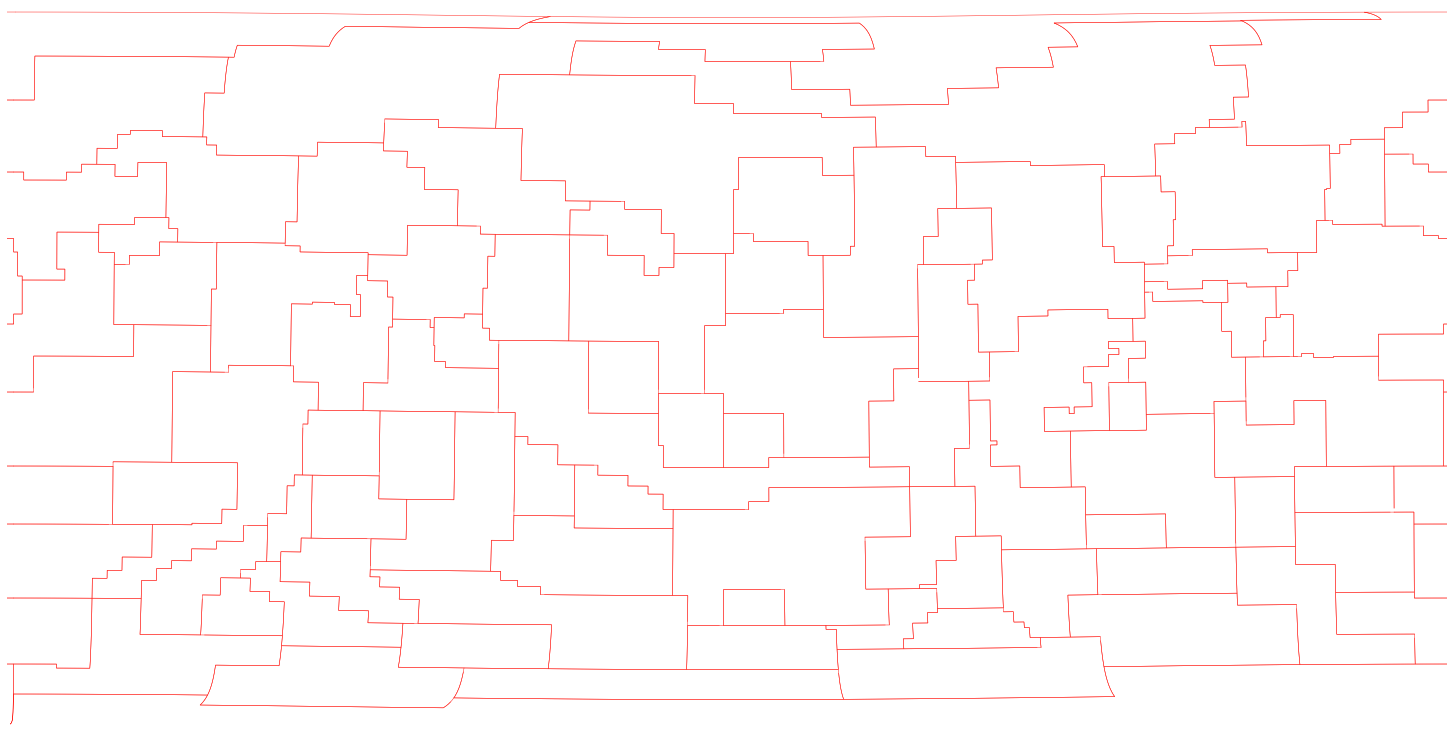

In [49]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=LowerThresholdPlateCarree(180))

for index, row in constellations.iterrows():
    ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=1, color=const_color)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/constellations.pdf')

<ipython-input-4-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-4-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


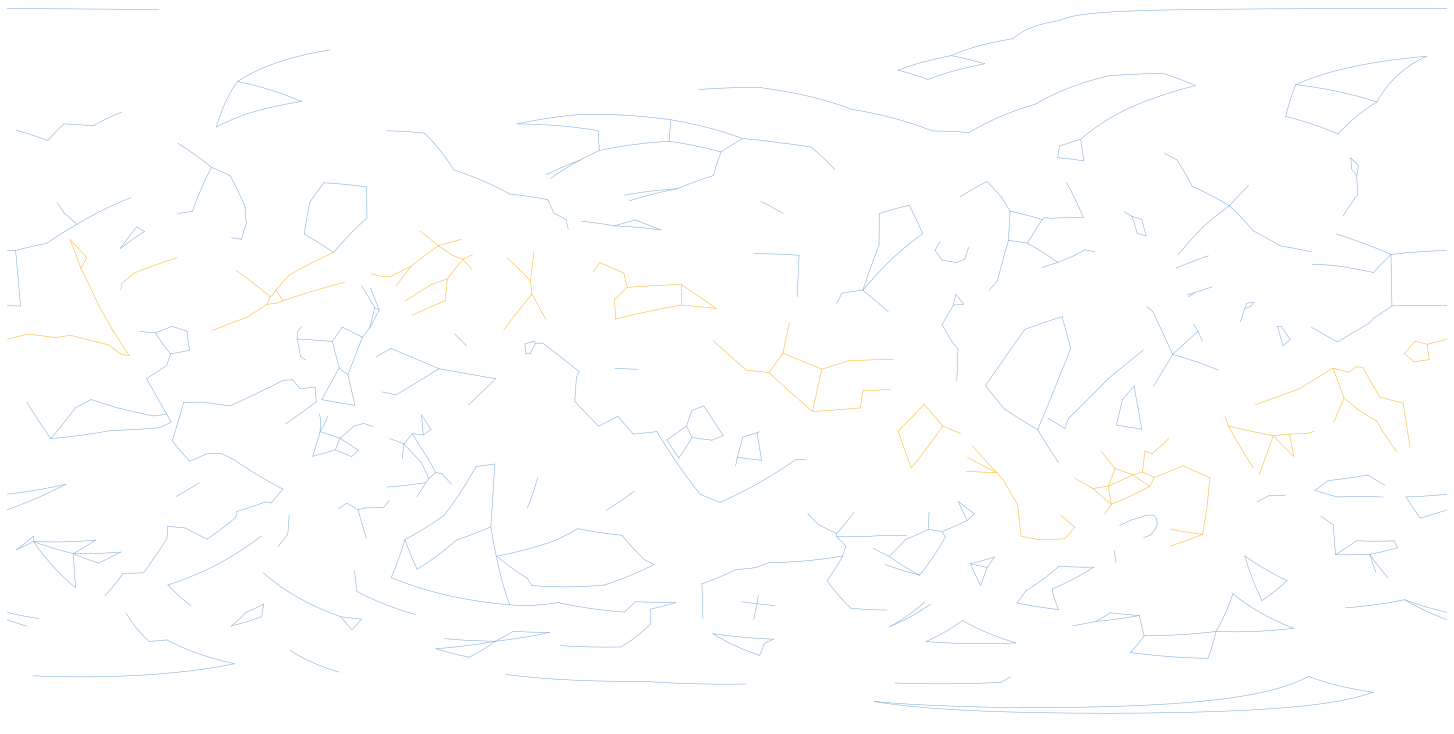

In [48]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=LowerThresholdPlateCarree(180))

for index, row in asterisms.iterrows():
    ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    color = nonzodiac_color
    if row['zodiac'] == True: 
        color = zodiac_color
    assert len(asterisms)%2 == 0
    for n in range(int(len(asterisms)/2)):
        ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), color=color, lw=0.5)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/asterisms.pdf')

<ipython-input-4-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-4-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


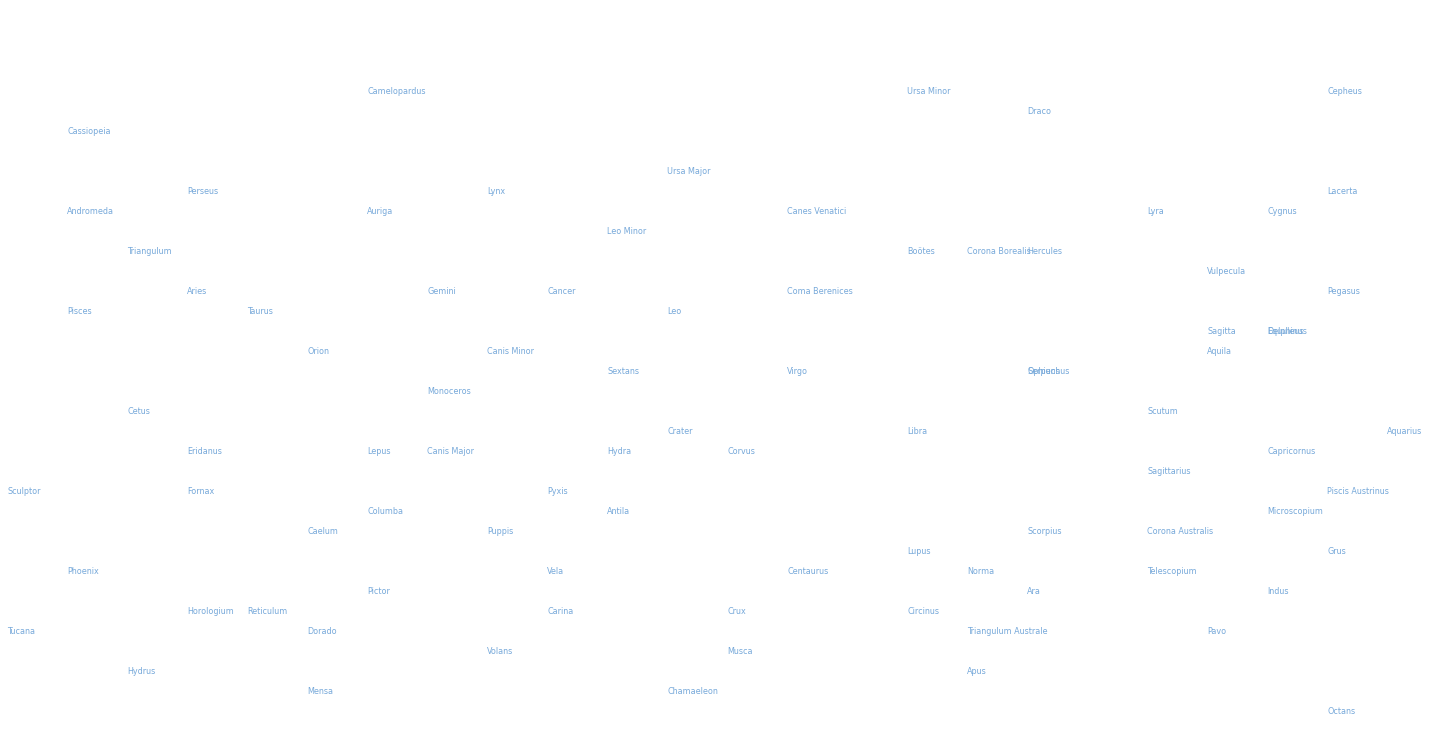

In [31]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

for index, row in const_names.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['name'], 
            transform=ccrs.Geodetic(), ha='left', va='top', fontsize=8, color=nonzodiac_color)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/constellation_names.pdf')

1516 labeled stars to plot


<ipython-input-4-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-4-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


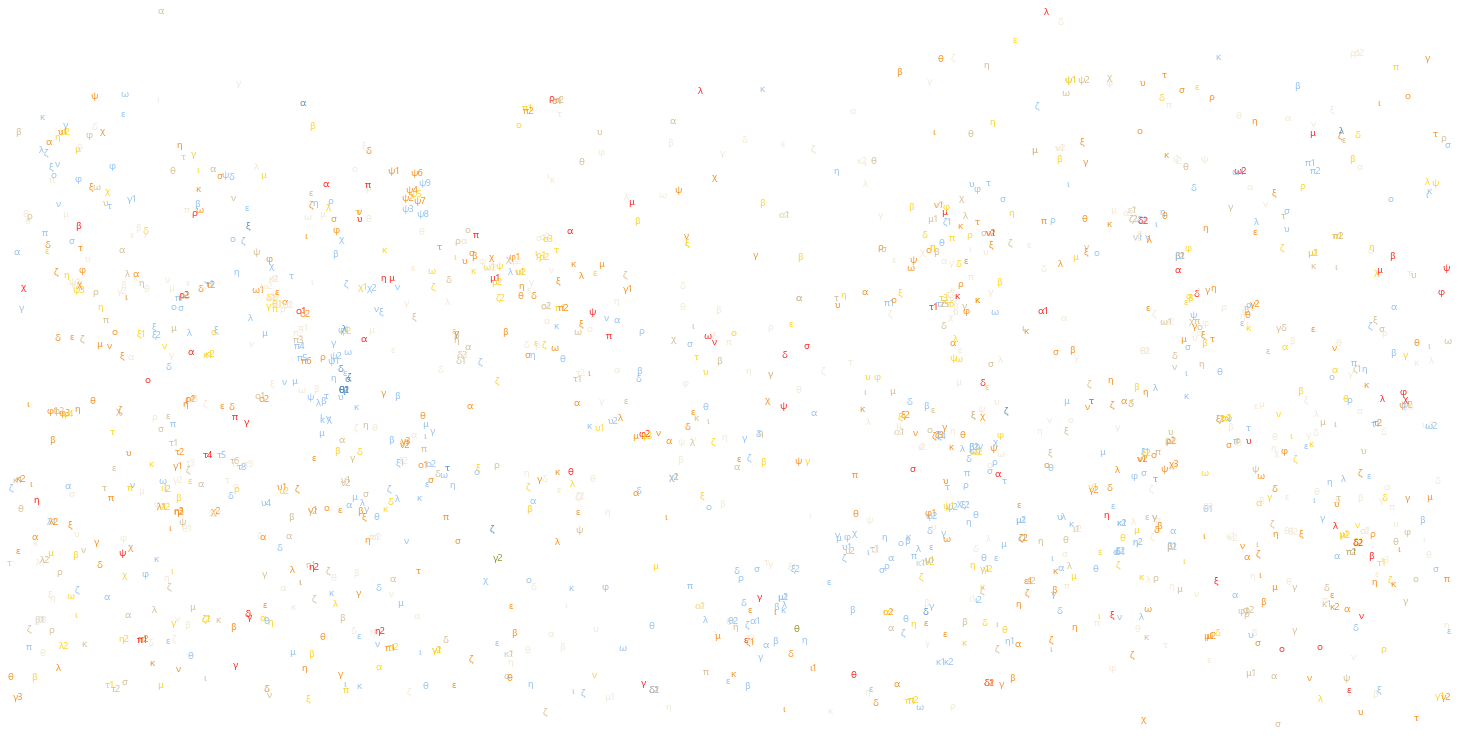

In [25]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

bayers = stars[pd.notnull(stars['bayer'])]
print(len(bayers), 'labeled stars to plot')

for index, row in bayers.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['greek_letters'], transform=ccrs.Geodetic(), 
            ha='center', va='center', fontsize=2, color=row['linecolor'], fontproperties=prop_seguisym)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/greek_letters.pdf')

131 labeled stars to plot


<ipython-input-4-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-4-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


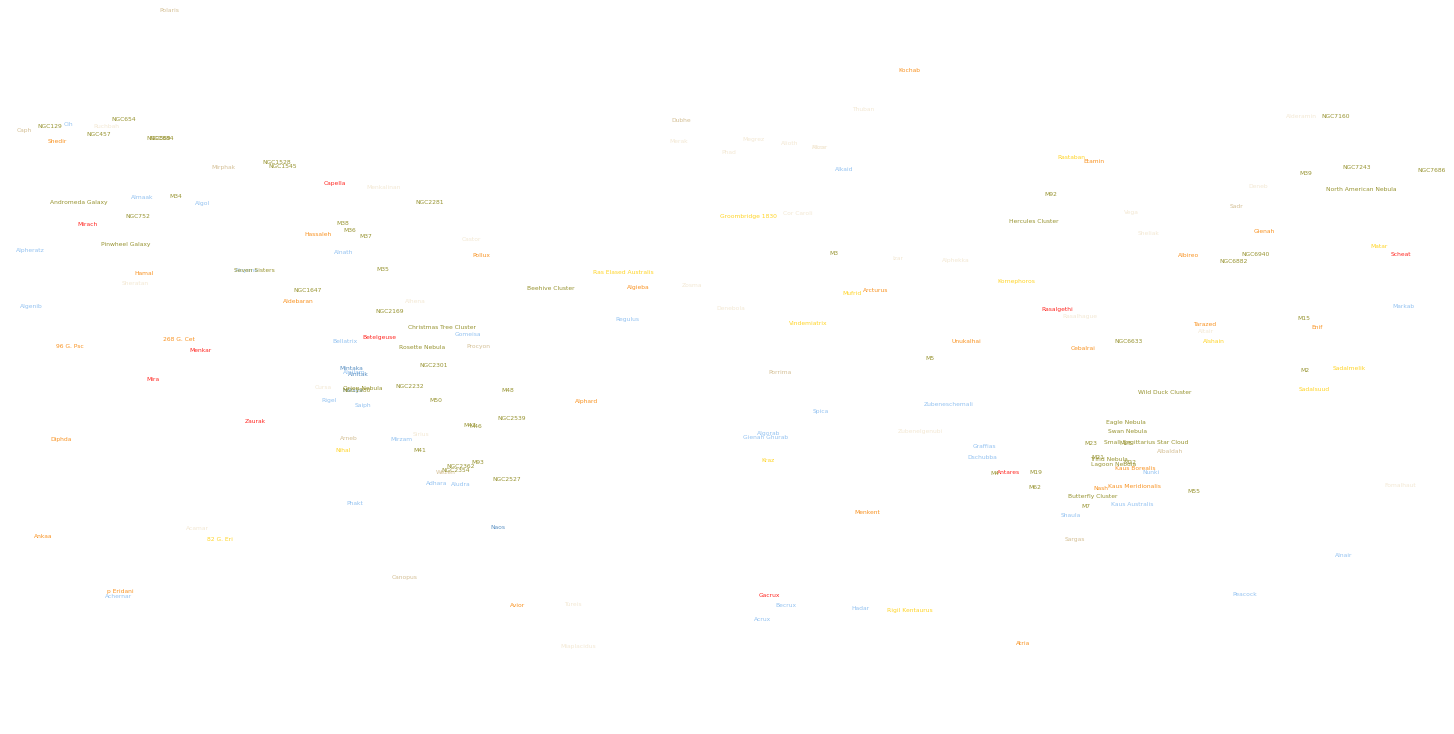

In [29]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

names = stars[pd.notnull(stars['proper'])]
print(len(names), 'labeled stars to plot')

for index, row in names.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['proper'], color=row['linecolor'],
            ha='left', va='center', fontsize=8, transform=ccrs.Geodetic())
    
for index, row in messiers.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['name_2'], color=other_color,
            ha='left', va='center', fontsize=8, transform=ccrs.Geodetic())
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/names.pdf')

7717 non-variable stars to plot


<ipython-input-4-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-4-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


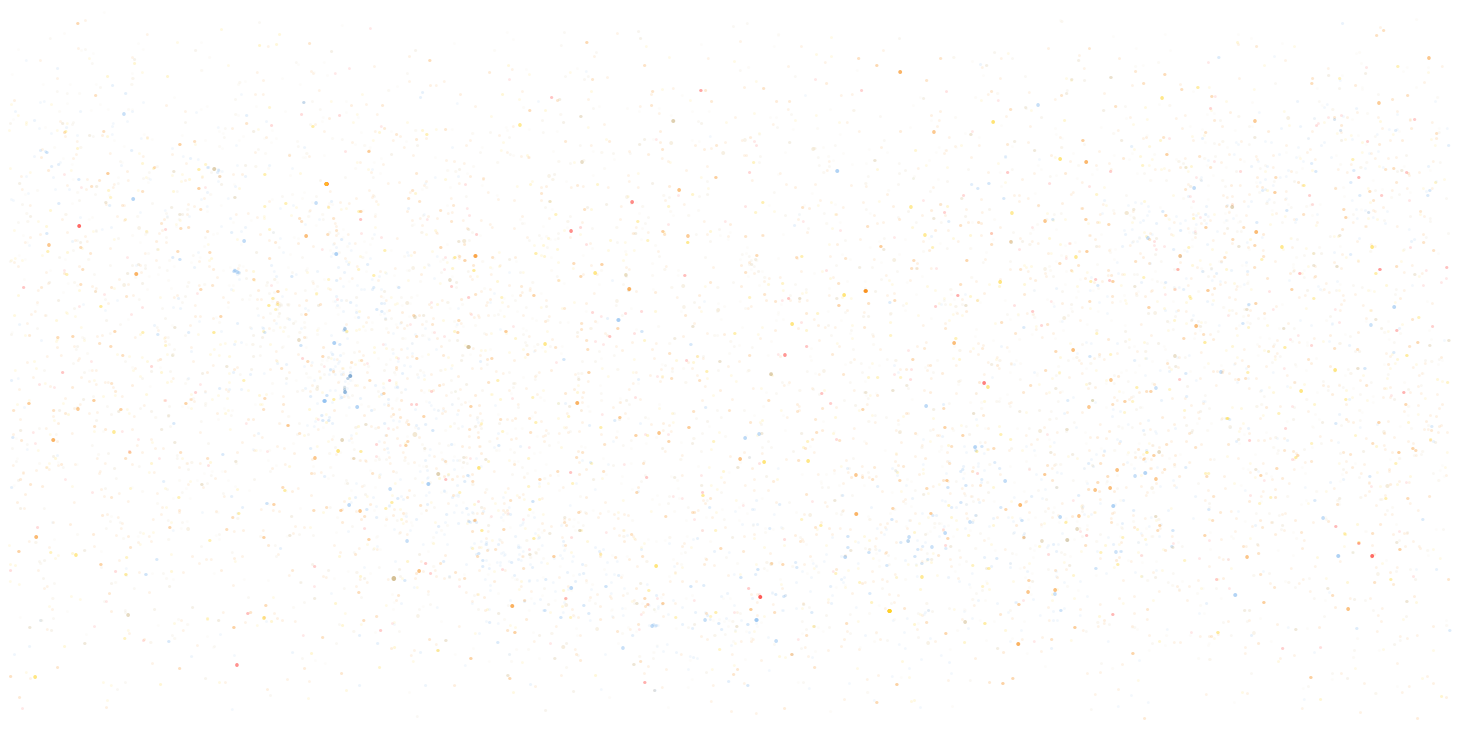

In [47]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

stars_nonvar = stars[pd.isnull(stars['var'])]
stars_nonvar = stars_nonvar[stars_nonvar['color'] != '#000000']
print(len(stars_nonvar), 'non-variable stars to plot')

# Change Unicode Zeichen für die Sterne
for index, row in stars_nonvar.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], u"\u2022", transform=ccrs.Geodetic(),
            fontproperties=prop_seguihis, fontsize=(18-row['mag']), 
            alpha=max(0.1, min(1,((6.5-row['mag'])*5)/(6.5*5))), color=row['color'], ha='center', va='center')
    
    
ax.set_xlim(ax.get_xlim()[::-1])
ax.axis('off')
set_save_image(fig, './figures/star_fills.pdf')

7723 non-variable stars to plot
0.0053 -44.290561 6.28 #FFD423
0.006638 26.918108 6.43 #d4bf94
0.008593 59.559679 6.18 #FFD423
0.009533 -53.097713 6.49 #FFD423
0.017941 -48.809876 5.71 #FFD423
0.022013 49.981558 6.22 #FFD423
0.022255 -50.337373 5.53 #FF2620
0.026616 -77.065724 4.78 #F99220
0.026949 61.222801 5.58 #d4bf94
0.027597000000000003 73.611846 6.5 #f3e8d3
0.028847 42.367144 6.25 #93C2F1
0.030402 -3.027504 5.13 #93C2F1
0.036139 27.082256 5.8 #FFD423
0.038867 -29.720414 5.04 #93C2F1
0.040046 8.956824000000003 6.33 #f3e8d3
0.041584 8.485463000000001 5.7 #d4bf94
0.043357 66.098966 5.87 #FFD423
0.049301 -20.045882 6.25 #d4bf94
0.052180999999999984 -24.145145 6.46 #F99220
0.06233 -17.335988 4.55 #93C2F1
0.070462 62.287664 5.9 #f3e8d3
0.07216499999999999 -16.529035999999998 5.78 #F99220
0.07231 -29.268822 6.38 #f3e8d3
0.075033 -10.509523 4.99 #F99220
0.07683 42.09253 6.11 #93C2F1
0.07813099999999999 -71.436891 5.59 #93C2F1
0.078304 67.166445 5.68 #F99220
0.081573 34.659797 6.09 #FFD42

1.245109 6.9951360000000005 6.04 #FFD423
1.246992 -0.973795 5.7 #d4bf94
1.253043 -45.531664 4.97 #d4bf94
1.262704 -68.875927 4.25 #d4bf94
1.270176 87.145496 6.2 #F99220
1.271922 33.11472 6.04 #F99220
1.275281 79.910013 6.27 #d4bf94
1.2843639999999998 -66.39785400000001 6.23 #f3e8d3
1.284739 44.901992 6.11 #F99220
1.290033 31.744617 6.36 #F99220
1.2966540000000002 3.614466 5.13 #f3e8d3
1.302818 47.419706 6.29 #F99220
1.313058 37.386275 6.44 #f3e8d3
1.324443 27.264059000000003 4.74 #f3e8d3
1.330082 -0.509029 5.87 #f3e8d3
1.334699 58.231611 4.95 #d4bf94
1.338733 77.57068199999998 6.31 #FFD423
1.341058 -11.238999 6.16 #F99220
1.342937 -3.2469900000000003 6.26 #F99220
1.35145 64.65813100000001 6.33 #f3e8d3
1.352047 28.738207 5.23 #F99220
1.366383 76.238804 6.37 #d4bf94
1.372337 45.528778 4.87 #F99220
1.375134 -19.081208 6.35 #d4bf94
1.376342 -0.4496729999999999 6.5 #F99220
1.376931 1.726332 6.21 #FF2620
1.3892639999999998 58.142994 6.36 #d4bf94
1.390264 20.468967000000006 5.97 #F99220
1.391

2.4094 -40.840458 6.17 #FFD423
2.413627 10.610565 5.48 #93C2F1
2.414987 -60.311947 5.36 #d4bf94
2.42706 50.278631 4.73 #F99220
2.432501 -12.29048 4.88 #f3e8d3
2.443115 -20.042617 5.89 #F99220
2.449755 -47.70384 4.24 #93C2F1
2.452011 27.012395 6.14 #F99220
2.456498 10.198326 6.45 #d4bf94
2.4577150000000003 31.80128 5.55 #F99220
2.46438 50.569974 6.16 #d4bf94
2.466647 1.960846 6.45 #F99220
2.467139 -33.811039 5.13 #f3e8d3
2.467878 -64.299768 6.35 #f3e8d3
2.469317 8.460054 4.3 #93C2F1
2.469439 29.66933 5.29 #d4bf94
2.47651 -31.102445 6.11 #F99220
2.480139 29.93176 5.89 #FFD423
2.487133 23.469026 6.2 #f3e8d3
2.493155 9.565629 6.09 #F99220
2.504611 33.833707000000004 6.26 #F99220
2.508986 25.235036 5.88 #d4bf94
2.509109 -22.545318 6.17 #FF2620
2.512556 0.255749 6.0 #f3e8d3
2.51511 17.703856 6.21 #FFD423
2.525027 2.267182 5.27 #F99220
2.527834 -79.109382 5.27 #FFD423
2.534786 -15.244677 4.74 #d4bf94
2.535045 36.147271 5.15 #F99220
2.53595 -1.0348959999999998 5.36 #FFD423
2.537432 -36.427307 

3.514359 -66.489714 5.81 #93C2F1
3.514549 12.936678 4.14 #F99220
3.524818 49.20977 6.29 #f3e8d3
3.525081 40.759934 6.5 #f3e8d3
3.530288 49.401093 6.41 #93C2F1
3.531568 -25.614149 6.38 #f3e8d3
3.53882 84.91104 5.62 #FFD423
3.540631 46.056862 5.3 #d4bf94
3.542992 -50.378646 5.67 #F99220
3.5433190000000003 9.373438 5.76 #93C2F1
3.544449 35.461729 5.91 #93C2F1
3.547642 -61.016872 6.42 #F99220
3.5589440000000003 58.76524000000001 6.45 #f3e8d3
3.560855 54.97485699999999 5.98 #f3e8d3
3.5614550000000005 57.868725 6.37 #d4bf94
3.563132 -21.632883 4.26 #93C2F1
3.565776 -31.080114 6.2 #d4bf94
3.568993 17.832828 6.14 #F99220
3.574062 24.464393 5.95 #f3e8d3
3.575996 -31.874801 6.39 #F99220
3.577075 -9.868261 6.25 #f3e8d3
3.5803 6.4176910000000005 6.49 #FFD423
3.5812230000000005 -25.582825 6.48 #F99220
3.583617 60.041429 6.43 #d4bf94
3.599235 -5.124954 6.49 #F99220
3.599352 -11.193782 5.56 #FFD423
3.608382 -78.323073 6.29 #F99220
3.614551 0.401662 4.29 #d4bf94
3.618244 -40.274545 4.57 #F99220
3.6299

4.797104 -30.020372 6.35 #F99220
4.8000690000000015 56.757183 5.29 #f3e8d3
4.801942 55.602611 6.32 #d4bf94
4.809037 -16.329484 5.76 #d4bf94
4.810107 -5.674045 5.77 #d4bf94
4.812396 3.5885260000000003 6.04 #F99220
4.813968 75.94121899999998 5.96 #f3e8d3
4.820235 31.437375 5.57 #F99220
4.8219650000000005 32.588190999999995 5.84 #f3e8d3
4.828402 -13.769669 6.27 #d4bf94
4.828912 15.904221 6.09 #F99220
4.830669 6.961276 3.19 #d4bf94
4.831846 37.488275 4.89 #F99220
4.83656 -16.217159 5.03 #F99220
4.837828 -41.320848 6.06 #d4bf94
4.843441 70.941528 6.36 #f3e8d3
4.843534 8.900176 4.35 #f3e8d3
4.848706 -53.461508 5.58 #d4bf94
4.849036 -53.459698 6.42 #d4bf94
4.852594 48.740685 5.64 #FFD423
4.853434 5.605104 3.68 #93C2F1
4.857837 -34.906286 5.82 #f3e8d3
4.862051 9.975078 6.11 #93C2F1
4.863885 13.655155 6.3 #d4bf94
4.868109 63.505421 5.47 #FF2620
4.877218 36.703187 4.79 #F99220
4.879754 27.897485 5.97 #d4bf94
4.879933 42.586626 5.68 #f3e8d3
4.881575 -5.4526949999999985 4.36 #f3e8d3
4.884919 -72.4

5.652417 41.358562 6.44 #F99220
5.654507 -17.849408 6.4 #93C2F1
5.65753 21.762929 6.42 #f3e8d3
5.658567 -9.706628 6.49 #93C2F1
5.658653 -3.564704 5.99 #f3e8d3
5.660817 -34.074108 2.65 #93C2F1
5.6621440000000005 75.043871 6.19 #FF2620
5.662277 25.897091 5.18 #93C2F1
5.6638449999999985 -32.629216 5.44 #FFD423
5.676641 31.358197 6.04 #93C2F1
5.677027 -2.825236 6.22 #93C2F1
5.679313 -1.942572 1.74 #5A90C3
5.680754 -1.128787 4.95 #93C2F1
5.684888 0.337753 5.93 #d4bf94
5.688255000000002 16.534148000000002 4.84 #93C2F1
5.68916 29.487418 6.4 #93C2F1
5.690812 -33.400741 6.35 #93C2F1
5.694538 -2.896457 6.41 #f3e8d3
5.694864 -16.72583 6.22 #93C2F1
5.701107 22.660325 6.35 #F99220
5.703217 -30.535442 6.18 #f3e8d3
5.7038769999999985 -22.373715 5.88 #f3e8d3
5.704021 -17.530376 6.15 #F99220
5.707347 65.697649 5.62 #F99220
5.707953 1.4746290000000002 4.9 #F99220
5.714976 -6.796167999999999 5.97 #d4bf94
5.71713 56.581522 6.05 #F99220
5.722686 -18.557475 5.73 #f3e8d3
5.7250489999999985 -39.406908 6.25 #d

6.398866 -25.577629 5.61 #F99220
6.399195 -52.69566 -0.62 #d4bf94
6.400281 -36.70776400000001 5.62 #F99220
6.400633999999998 8.885014 6.24 #93C2F1
6.402867 -11.530088 5.21 #F99220
6.40385 -60.281325 5.78 #f3e8d3
6.405716 -12.961939 6.12 #93C2F1
6.407384 -63.428929 6.45 #FFD423
6.412152 25.048714 6.35 #F99220
6.412193 -28.780112 6.37 #FFD423
6.41236 -40.283979 6.3 #93C2F1
6.414658 16.057129999999994 6.35 #FFD423
6.415501 -63.828144 6.26 #93C2F1
6.421263 -0.945883 5.88 #d4bf94
6.424623 -69.690299 5.37 #FFD423
6.425001 -35.064153000000005 6.24 #F99220
6.425816 23.327169 6.05 #f3e8d3
6.428793 -48.176898 5.76 #93C2F1
6.42976 -3.889032 6.33 #FFD423
6.431202 11.125884 6.39 #f3e8d3
6.433008 -7.894983 6.4 #f3e8d3
6.435986 -3.5156910000000003 6.42 #FFD423
6.442901 -4.5974 6.16 #93C2F1
6.444329 -1.507336 5.87 #f3e8d3
6.445183 -14.603429 6.32 #F99220
6.445792 -7.511936 6.35 #f3e8d3
6.44691 58.417409 5.21 #F99220
6.450243 -4.355658999999998 6.5 #93C2F1
6.451147 -58.002116 5.82 #F99220
6.452107 -37.

7.2927 52.131071 5.93 #F99220
7.29518 38.876265 6.48 #F99220
7.29667 -26.797556 6.45 #93C2F1
7.3006160000000015 40.883392 5.87 #f3e8d3
7.301136 30.955872 6.19 #f3e8d3
7.301181 -43.986786 5.86 #93C2F1
7.30155 16.540383 3.58 #f3e8d3
7.308883 49.464756 5.0 #f3e8d3
7.309309 -39.210285 5.24 #f3e8d3
7.3142429999999985 -26.585854 5.29 #FFD423
7.3172 -19.280304 6.06 #d4bf94
7.320469 -33.727166 6.31 #F99220
7.322881 2.740694 5.9 #FFD423
7.329900999999999 7.142947 5.91 #d4bf94
7.335234 15.142928 6.45 #f3e8d3
7.335383 21.98232 3.5 #d4bf94
7.339288000000002 -52.311524 5.5 #d4bf94
7.344114 -52.085924 5.38 #93C2F1
7.3495240000000015 -14.360489 5.59 #FFD423
7.3508619999999985 42.655913 6.33 #F99220
7.354864 45.2282 5.74 #f3e8d3
7.3657949999999985 20.443658 5.09 #FF2620
7.3672369999999985 -8.979377000000003 6.42 #5A90C3
7.367397 36.760584 5.12 #F99220
7.367633 0.177121 5.99 #93C2F1
7.370392 38.995944 6.4 #F99220
7.370425 -19.0166 4.94 #93C2F1
7.37144 59.901996 6.36 #f3e8d3
7.3718309999999985 -2.979175

8.239165 13.048296 6.39 #FFD423
8.239965 -45.834522 5.86 #93C2F1
8.247567 -46.485892 6.45 #93C2F1
8.254427 -62.915643 5.16 #f3e8d3
8.256461 -50.449222 6.44 #F99220
8.264031 60.380602 6.43 #f3e8d3
8.264596000000001 -30.925944 6.22 #FFD423
8.26634 -35.903191 6.15 #F99220
8.275256 9.185545 3.53 #F99220
8.281654 84.057642 6.45 #f3e8d3
8.289759 -16.285110999999997 6.32 #f3e8d3
8.292125 8.86631 6.28 #FFD423
8.296153 -36.067591 6.42 #FF2620
8.297338 59.571133 5.63 #f3e8d3
8.298822999999999 -59.166825 6.47 #d4bf94
8.299522 -30.003697 6.43 #F99220
8.304006 15.67792 6.42 #F99220
8.304388000000001 54.143696 6.26 #F99220
8.304832000000001 -35.451703 5.59 #F99220
8.305219000000001 -65.613192 5.06 #F99220
8.306650999999999 -12.632173 5.95 #F99220
8.308703 -76.919722 4.05 #d4bf94
8.309258 -36.659288 4.44 #f3e8d3
8.318219000000001 -48.197853 6.45 #93C2F1
8.324864999999999 -34.590137 6.44 #93C2F1
8.325619999999999 75.756907 5.55 #FFD423
8.330274000000001 -71.51490600000002 5.33 #93C2F1
8.330518 3.94803

9.262522 -37.413144 4.63 #d4bf94
9.263832 56.74140600000001 5.28 #F99220
9.264639 72.946326 5.93 #d4bf94
9.267786 -44.898723 6.02 #f3e8d3
9.270024 -57.541473 4.34 #FF2620
9.273066 -44.265735 5.12 #F99220
9.278158 -8.744759 5.49 #93C2F1
9.27826 -6.353144 5.24 #F99220
9.282514 -11.103111 6.45 #F99220
9.282523 -39.401539 5.31 #F99220
9.284838 -59.275229 2.21 #f3e8d3
9.285478 -14.574069 5.83 #F99220
9.288149 -68.689642 5.38 #d4bf94
9.290334 -74.894313 5.28 #f3e8d3
9.291005 -74.73459100000002 5.86 #f3e8d3
9.291993 46.817228 5.96 #f3e8d3
9.295082 -54.494829 6.33 #F99220
9.297599 11.501146 6.4 #f3e8d3
9.301633 -51.050859 5.26 #93C2F1
9.307199 35.36408 5.94 #f3e8d3
9.314069 36.802597 3.82 #f3e8d3
9.325689 -55.186471 6.28 #93C2F1
9.32587 -15.834663 5.79 #F99220
9.329551 -11.974853 4.77 #FFD423
9.329982 -34.103339 6.4 #93C2F1
9.332156 74.016601 6.42 #FFD423
9.341394 -9.555695 4.8 #d4bf94
9.341576 -37.581688 6.04 #F99220
9.345493 51.266066 6.14 #d4bf94
9.348749 -15.617826 6.3 #d4bf94
9.349117 -62

10.457792 41.601035 6.0 #f3e8d3
10.460831 9.762396 6.01 #f3e8d3
10.464649 -58.739403 3.81 #d4bf94
10.464727 36.707212 4.2 #FFD423
10.467247 -49.405801 6.1 #F99220
10.467738 48.784901 6.42 #FFD423
10.476812 45.212211 6.37 #F99220
10.478878 -3.742385 6.05 #f3e8d3
10.481274 -64.172278 5.27 #F99220
10.484362 -65.176244 6.42 #FF2620
10.491306 -2.739078 5.19 #93C2F1
10.491383 -29.663832 5.58 #F99220
10.493161 -30.607065 5.57 #93C2F1
10.495037 84.252009 5.52 #d4bf94
10.498453 65.626233 6.32 #F99220
10.501792 38.925132 5.79 #f3e8d3
10.505581 -71.992793 4.72 #f3e8d3
10.507396 64.257689 6.07 #f3e8d3
10.510461 55.980536 4.82 #d4bf94
10.510901 -61.356474 6.41 #FF2620
10.516323 -7.63755 6.2 #F99220
10.516622 -13.58847 5.59 #93C2F1
10.517242 -73.22149 4.94 #F99220
10.518048 82.558587 5.25 #d4bf94
10.522775 -53.715484 4.89 #d4bf94
10.53019 -28.237103 6.04 #d4bf94
10.530937 32.379554 5.9 #f3e8d3
10.532401 -45.06966 6.04 #93C2F1
10.532622 -45.06671 5.76 #93C2F1
10.536604 14.13727 5.43 #FF2620
10.54267 

11.767515 47.779406 3.69 #F99220
11.775232 -61.178398 4.11 #FFD423
11.775376 -40.500354 4.89 #FFD423
11.782116 55.62819 5.27 #F99220
11.78529 -35.906862 6.16 #FFD423
11.787731 -30.28651 6.48 #FFD423
11.798584 8.245894999999999 5.31 #f3e8d3
11.799762 20.218931 4.5 #f3e8d3
11.806524 -10.313105 6.24 #d4bf94
11.810753 14.28421 5.9 #d4bf94
11.817023 -0.31867 6.15 #d4bf94
11.817663 14.57206 2.14 #f3e8d3
11.820774 16.242882 6.05 #f3e8d3
11.828077 -63.78847800000001 4.3 #93C2F1
11.828258 34.931758 5.73 #d4bf94
11.832395 -70.22579 4.98 #FFD423
11.838779 -15.863667 6.13 #FFD423
11.840911 -62.64938100000001 5.68 #f3e8d3
11.843663 -27.277936 6.48 #FFD423
11.844922 1.764718 3.59 #d4bf94
11.848706 12.279037 6.37 #f3e8d3
11.85062 -5.333332 5.62 #F99220
11.852419 -45.17347 4.47 #F99220
11.852642 33.375013 6.25 #f3e8d3
11.856084 -12.187811 6.34 #d4bf94
11.861559 -30.834809000000003 5.85 #d4bf94
11.864237 -65.20591 4.89 #93C2F1
11.869537 -56.987741 5.56 #93C2F1
11.890783 -35.066645 6.17 #f3e8d3
11.89716

13.163291 16.848611 5.91 #F99220
13.165831 -5.53901 4.38 #f3e8d3
13.166469 17.529431 4.32 #d4bf94
13.167563 38.498981 5.91 #f3e8d3
13.185804999999998 -42.232891 5.78 #d4bf94
13.189789 -43.36855300000001 5.24 #F99220
13.194223 -26.551722 6.49 #f3e8d3
13.197612 -69.942017 5.92 #d4bf94
13.197904 27.878183 4.23 #FFD423
13.198076 -63.302992 6.32 #d4bf94
13.200901000000002 -37.803022 4.85 #FFD423
13.200984 -16.198601 5.04 #d4bf94
13.202336 24.258027 6.31 #F99220
13.207070000000002 80.47130899999998 6.25 #F99220
13.209145 11.556096 5.76 #FF2620
13.21355 -66.226747 5.91 #f3e8d3
13.214123 -42.69972 6.19 #F99220
13.215475 -59.816605 6.18 #FFD423
13.220114 18.727008 6.1 #FFD423
13.223156 -50.699829 5.9 #93C2F1
13.226651 36.887582 6.5 #FF2620
13.228597 40.152885 4.94 #F99220
13.232698 -43.139107 6.16 #F99220
13.236361 -19.930947 5.31 #FFD423
13.236699 -58.683937 5.91 #F99220
13.237578 -59.103235 4.9 #d4bf94
13.238153 -78.44745400000002 5.84 #d4bf94
13.245361 -48.957022 5.84 #F99220
13.252629 -36.3

14.469564000000002 -29.491638 4.97 #93C2F1
14.470038 -2.227957 4.81 #FFD423
14.471234 36.197028 6.22 #F99220
14.477197 49.844851 5.58 #FFD423
14.478256 -6.900536 5.42 #F99220
14.47875 -59.197548 6.46 #f3e8d3
14.481087 -47.992086 6.4 #f3e8d3
14.493549 41.795911 6.36 #FFD423
14.493626999999998 -76.729083 6.06 #F99220
14.497131 31.791188 6.06 #f3e8d3
14.497366 0.8289290000000001 5.96 #f3e8d3
14.502399 -45.321355 5.51 #93C2F1
14.505823 -49.519018 5.38 #f3e8d3
14.512607999999998 4.772286 6.01 #F99220
14.512832 63.185788 6.1 #d4bf94
14.515728 -40.845122 6.39 #F99220
14.519678 -38.869708 5.99 #F99220
14.521223999999998 -67.717197 5.84 #F99220
14.5305 30.371437 3.57 #F99220
14.538953 26.677284000000004 6.0 #f3e8d3
14.541926 55.39801 5.74 #F99220
14.542374 22.260059 5.91 #d4bf94
14.55268 -30.715068 6.07 #F99220
14.558325 -52.679522 5.86 #F99220
14.559004000000002 -54.998628 5.86 #d4bf94
14.560710999999998 79.660427 6.27 #F99220
14.569915 32.534477 6.32 #d4bf94
14.571063 57.06525799999999 6.46 #

15.669889 -70.22788299999999 6.45 #f3e8d3
15.670981 -31.213771 6.35 #F99220
15.67136 -23.818078 4.97 #F99220
15.672598 -73.446685 5.64 #93C2F1
15.682844 -47.736091 6.21 #F99220
15.683082999999998 16.024588 6.0 #FFD423
15.686505 -44.661205 4.64 #d4bf94
15.692516 19.670401 4.51 #f3e8d3
15.698527 -76.081959 5.95 #93C2F1
15.698532 18.464037 5.8 #f3e8d3
15.699110999999998 -19.678828 4.75 #F99220
15.710341 -49.489553 6.02 #F99220
15.710645 -37.424935 5.23 #FFD423
15.711395 -34.710407000000004 4.75 #93C2F1
15.719592 13.667666 6.48 #FFD423
15.721161 -84.465273 5.57 #f3e8d3
15.723572 -15.04323 6.3 #F99220
15.732022 -60.28721700000001 6.46 #FFD423
15.73314 32.515807 5.57 #FFD423
15.733839 2.515173 5.86 #FFD423
15.734298999999998 77.794493 4.29 #f3e8d3
15.734556 -15.672834 5.41 #f3e8d3
15.737798000000002 6.425627 2.63 #F99220
15.739633 -41.819089 5.93 #f3e8d3
15.745037 17.264226 6.15 #f3e8d3
15.749884 -50.785463 6.41 #f3e8d3
15.756523 5.4473150000000015 5.57 #f3e8d3
15.760974 0.8910389999999999 6

16.900106 -57.909507 5.91 #FF2620
16.900131 10.165359 4.39 #93C2F1
16.90051 -41.806389 5.46 #93C2F1
16.907484 -42.478891 5.84 #d4bf94
16.908765 -49.7108 6.49 #F99220
16.909731 -42.361313 3.62 #F99220
16.909914999999998 -6.153982 5.23 #F99220
16.909988000000002 -30.58734 6.34 #f3e8d3
16.915324 20.958488 5.39 #FFD423
16.916251000000006 -41.150858 5.78 #5A90C3
16.917267000000002 25.730681 6.06 #FFD423
16.917592000000006 -42.090831 6.3 #5A90C3
16.922825 18.433213 5.35 #F99220
16.923523 -63.269659 5.99 #f3e8d3
16.932707999999998 -33.506873 6.29 #F99220
16.93375 65.134796 4.88 #d4bf94
16.933845 -16.806263 6.33 #F99220
16.937982 73.12786700000002 6.29 #d4bf94
16.940360000000002 65.039124 6.4 #d4bf94
16.941328 -52.283746 5.94 #f3e8d3
16.946676999999998 -23.150346 5.57 #f3e8d3
16.950294 -71.111644 6.46 #f3e8d3
16.951106 -19.539856 6.27 #93C2F1
16.953104 -33.259492 5.48 #F99220
16.957222 -10.963373 6.15 #FFD423
16.958624 25.352841 6.27 #FFD423
16.9589 13.884113 6.38 #F99220
16.961752 24.38126 6.

18.000949 16.750919 4.67 #F99220
18.002526 80.00409499999998 5.74 #F99220
18.007683 19.505786 6.42 #93C2F1
18.008058 -3.690269 4.62 #d4bf94
18.010104000000005 33.213682 6.01 #F99220
18.010754000000006 2.931568 3.93 #93C2F1
18.014683 6.268294 6.36 #93C2F1
18.015909 15.09355 6.28 #FFD423
18.023089 -17.156868 6.27 #F99220
18.025113 21.595782 4.26 #FFD423
18.026168 -85.214828 6.45 #d4bf94
18.026639000000007 33.311266 6.18 #F99220
18.029222 1.305076 4.42 #f3e8d3
18.030083 -36.377864 6.3 #93C2F1
18.031772 -22.780298 5.72 #93C2F1
18.041709 22.92323 6.22 #93C2F1
18.047527 -24.282468 5.37 #d4bf94
18.051367000000006 -8.180349 4.77 #d4bf94
18.052468 48.464269 6.26 #f3e8d3
18.054045 19.613157 6.41 #f3e8d3
18.064568 -24.36073 5.89 #5A90C3
18.080662 -35.901442 5.98 #F99220
18.090767 -81.486568 6.37 #F99220
18.091705 21.646624 6.18 #F99220
18.096803 -30.424091 2.98 #F99220
18.097114 32.230674 5.72 #F99220
18.100528 22.218879 4.96 #FF2620
18.102055 -8.323955999999999 5.84 #93C2F1
18.102063 -0.446128 6

18.991465 -70.468653 6.49 #f3e8d3
18.993711 15.068298 4.02 #F99220
18.995966 26.230404 5.26 #F99220
19.000229 32.145514 4.94 #F99220
19.000987 -66.65361800000001 5.98 #F99220
19.006892 -24.942171 6.35 #F99220
19.012072 55.658301 5.51 #FFD423
19.015334 33.802158 6.04 #F99220
19.017861 -37.061555 6.44 #93C2F1
19.018176 19.309605 6.47 #F99220
19.021488 26.291411 5.69 #93C2F1
19.023991 46.934812 5.0 #f3e8d3
19.025977 -15.282617000000002 6.31 #F99220
19.02715 -22.695364 6.25 #F99220
19.028008 -5.739115 4.02 #F99220
19.030103 33.621257 6.39 #93C2F1
19.030397 22.264412 6.44 #f3e8d3
19.035288 52.261058 6.35 #FFD423
19.035698 -41.910505 6.21 #f3e8d3
19.039324 8.373539 6.25 #F99220
19.041022 -24.846826 5.63 #F99220
19.043532 -29.880105 2.6 #f3e8d3
19.04795 19.661011 6.11 #F99220
19.048472 -3.698987 5.4 #f3e8d3
19.051057 -19.245686 5.96 #F99220
19.051907 -42.095105 4.74 #f3e8d3
19.051944 -19.103024 6.37 #d4bf94
19.058242 -68.755544 5.89 #d4bf94
19.058959 1.818768 5.82 #f3e8d3
19.065985 -51.018604

20.024594 64.82097399999999 5.22 #FF2620
20.029086 24.800423 5.88 #93C2F1
20.03123 -66.943966 5.32 #F99220
20.032944 -13.637217 5.69 #f3e8d3
20.03373 24.938043 5.23 #d4bf94
20.03894 64.634419 6.27 #FFD423
20.039473 22.151458 6.5 #93C2F1
20.046892 31.958832 6.39 #F99220
20.04696 67.873565 4.51 #F99220
20.054555 18.500993 5.99 #F99220
20.058338 16.031254999999998 5.73 #93C2F1
20.059291 -37.940699 4.77 #F99220
20.060373 29.896805 5.73 #FFD423
20.060777 22.941058 6.45 #F99220
20.062309 -22.595595 6.44 #d4bf94
20.068399 17.070173 5.8 #FFD423
20.068976 7.277966 5.51 #F99220
20.072108 -32.056296 4.99 #F99220
20.073098 -0.709309 5.67 #F99220
20.074665 48.229664 6.16 #f3e8d3
20.079032 63.890207 6.24 #f3e8d3
20.081502 68.027159 6.32 #FF2620
20.085207 51.839398 6.14 #FF2620
20.08597 19.991071 5.09 #F99220
20.086039000000003 38.478457 6.18 #FFD423
20.089306 56.341422 6.19 #d4bf94
20.092216 -67.320897 6.07 #FFD423
20.092444 61.99542 5.4 #F99220
20.103396 -4.07821 6.47 #F99220
20.103823 53.165688 5.

21.106855 -32.341618 5.2 #F99220
21.107087 -41.385965 5.55 #F99220
21.110026 47.648403 4.56 #F99220
21.111067 3.803119 6.48 #F99220
21.115163 38.742055 6.05 #F99220
21.118797 -25.005853 4.49 #F99220
21.126012 15.658657 6.27 #F99220
21.129033 -45.379469 6.45 #f3e8d3
21.129082 -17.455902 6.18 #93C2F1
21.14115 6.989358 6.14 #F99220
21.142417 -63.92826 5.75 #F99220
21.142673 -21.193669 5.3 #f3e8d3
21.156052 -73.17296800000003 5.67 #FFD423
21.156203 -36.705937 6.47 #d4bf94
21.159165 -20.556661 6.25 #d4bf94
21.159902 -11.371693 4.5 #FFD423
21.166185 2.943681 6.44 #d4bf94
21.17099 53.5631 5.75 #93C2F1
21.175266 47.692224 6.46 #93C2F1
21.175365 10.048922 6.07 #f3e8d3
21.179705 -9.354074 6.27 #F99220
21.189135 -72.544353 6.18 #F99220
21.196733 59.98661 5.64 #93C2F1
21.203806 -40.269362 5.83 #d4bf94
21.215607 30.226916 3.21 #FFD423
21.21751 -39.424922 5.25 #d4bf94
21.221479 -27.619333 5.41 #F99220
21.221933 -36.423527 5.97 #F99220
21.222351 -70.126267 5.06 #FF2620
21.222665 81.230972 6.12 #f3e8d

22.231312 39.714927 4.5 #F99220
22.238342000000006 -21.074566 5.33 #F99220
22.238445 17.189344000000002 6.5 #F99220
22.238542 -27.766908 5.45 #93C2F1
22.244039 -41.381666 6.23 #FFD423
22.245656 42.95391 5.72 #f3e8d3
22.259732 -44.451499 6.1 #FFD423
22.260253 -41.3467 4.79 #FFD423
22.26616 37.748737 4.14 #F99220
22.266619 8.549574 6.21 #f3e8d3
22.274039 57.220238 5.88 #FFD423
22.274045 -41.627225 5.11 #FFD423
22.274902 27.80403 6.38 #FFD423
22.276015 -1.5963889999999998 6.16 #f3e8d3
22.277073 -25.898162 6.14 #F99220
22.280012 -12.831436 5.34 #F99220
22.280565 -7.783289999999999 4.17 #FFD423
22.281268 -9.040067 5.8 #F99220
22.283287 -23.140247 6.17 #F99220
22.285139 -5.387164 5.75 #FFD423
22.2912 49.126957 6.46 #F99220
22.297409 -77.511553 5.49 #d4bf94
22.301187 -0.237656 6.39 #d4bf94
22.303505 62.804388 5.75 #F99220
22.304289 -53.627073 5.36 #FFD423
22.308371 -60.259587 2.87 #F99220
22.315611 37.769286 6.19 #f3e8d3
22.316872 -13.304995000000002 5.96 #F99220
22.336643 -7.8211020000000016

23.285765 -28.438273 6.24 #FF2620
23.286094 3.282289 3.7 #FFD423
23.287958 45.164167 6.44 #F99220
23.288574 75.299025 6.35 #f3e8d3
23.290498 -58.235734 3.99 #d4bf94
23.294467 -11.712942 6.33 #f3e8d3
23.295732 49.0153 4.82 #FF2620
23.302739000000006 -40.824361 5.54 #d4bf94
23.305557 -67.471177 6.15 #F99220
23.3104 68.11144499999999 4.75 #F99220
23.313733 -32.532027 4.41 #F99220
23.316021 -9.61075 4.99 #f3e8d3
23.317582 -28.387846000000003 6.49 #F99220
23.318518 -13.458552 5.2 #FFD423
23.319045000000006 -79.472409 6.34 #F99220
23.323327 -5.124352 5.56 #d4bf94
23.323363 -18.075376 5.96 #F99220
23.324281 34.793183 6.32 #93C2F1
23.324945 48.625322 5.44 #F99220
23.328193 48.380935 6.29 #F99220
23.328651 -33.708052 6.35 #F99220
23.331225 42.078044 5.81 #FF2620
23.337326 61.97012900000001 6.39 #F99220
23.339051 5.381307 5.05 #F99220
23.342927 62.213264 6.41 #F99220
23.344691 -5.907975 6.17 #F99220
23.345583 44.116167 6.25 #f3e8d3
23.347097 30.414921000000003 5.58 #FF2620
23.347267 -50.306559 6

<ipython-input-4-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-4-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


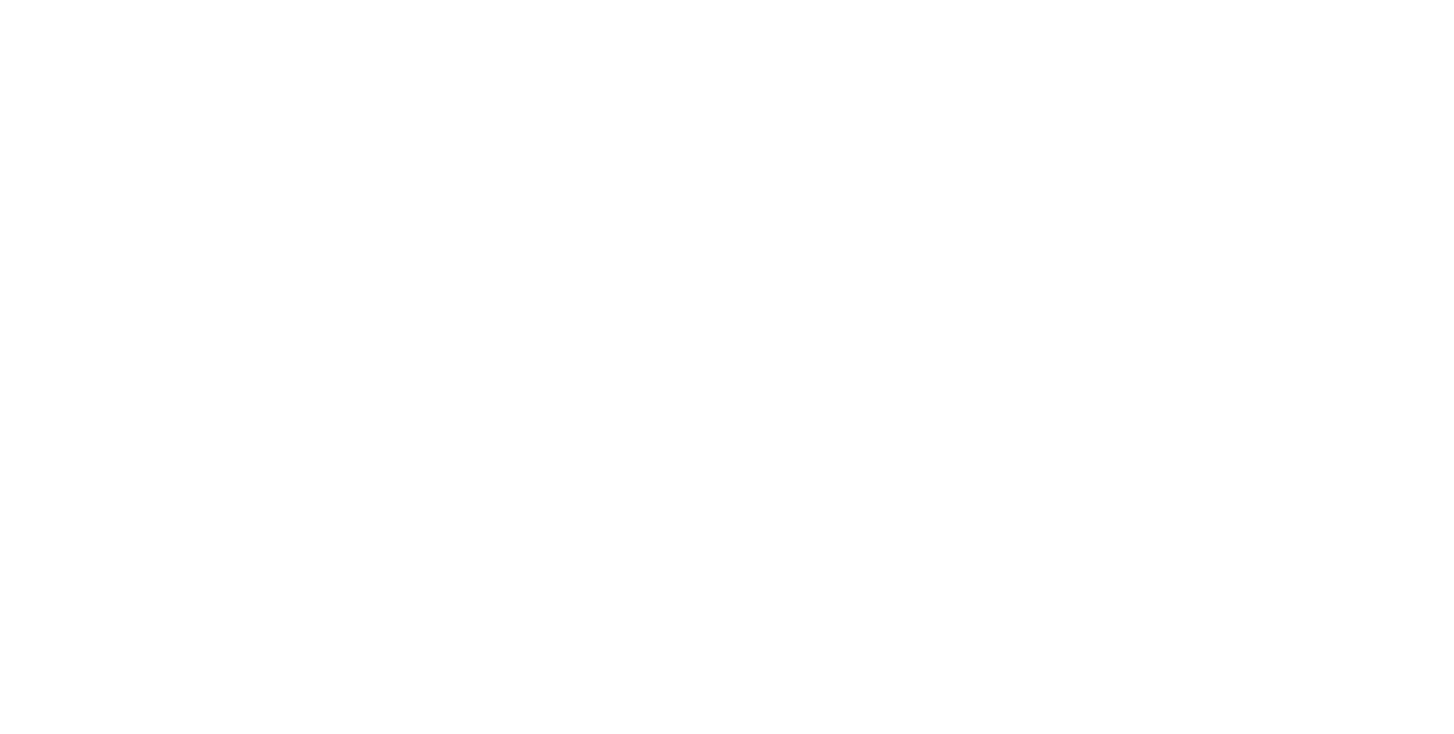

In [46]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

stars_nonvar = stars[pd.isnull(stars['var'])]
print(len(stars_nonvar), 'non-variable stars to plot')

for index, row in stars_nonvar.iterrows(): 
    try:
        ax.scatter(row['ra']*360/24, row['dec'], transform=ccrs.Geodetic(), alpha=1,
           s=(6.5-row['mag'])*5, edgecolor=row['color'], lw=0.5, color='k', zorder=6.5-row['mag'])
    except:
        print(row['ra'], row['dec'], row['mag'], row['color'])
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/star_lines.pdf')

<ipython-input-45-61d9a85b589a>:4: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


1189 variable stars to overplot


<ipython-input-4-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-4-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


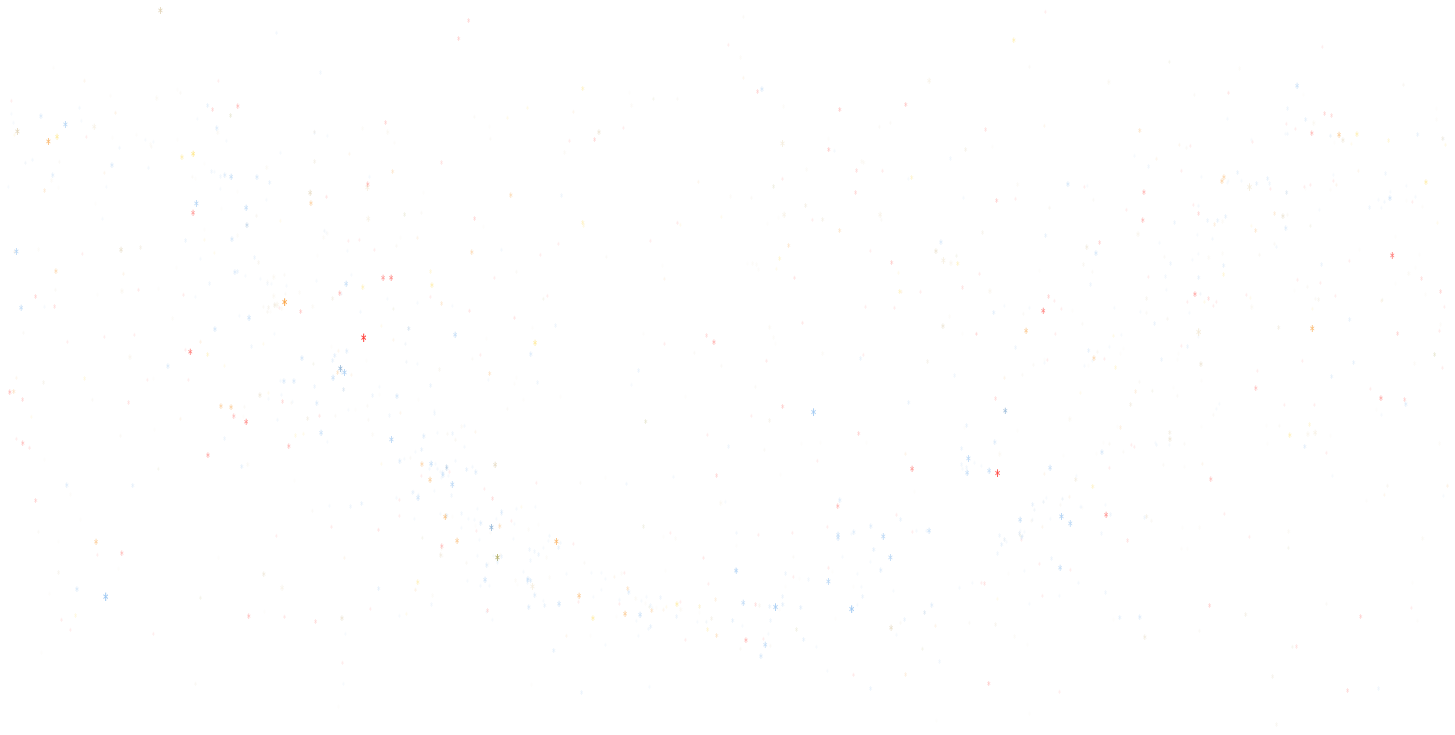

In [45]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))
ax.set_global()
ax.background_patch.set_fill(False)

stars_var = stars[pd.notnull(stars['var'])]
print(len(stars_var), 'variable stars to overplot')

for index, row in stars_var.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], u"\u16BC", transform=ccrs.Geodetic(),
            fontproperties=prop_seguihis, fontsize=(12-row['mag']), 
            alpha=max(0.1, min(1,((6.5-row['mag'])*5)/(6.5*5))), color=row['color'], ha='center', va='center')
    
ax.set_xlim(ax.get_xlim()[::-1])
ax.axis('off')
set_save_image(fig, './figures/variable_stars.pdf')

<ipython-input-4-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-4-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


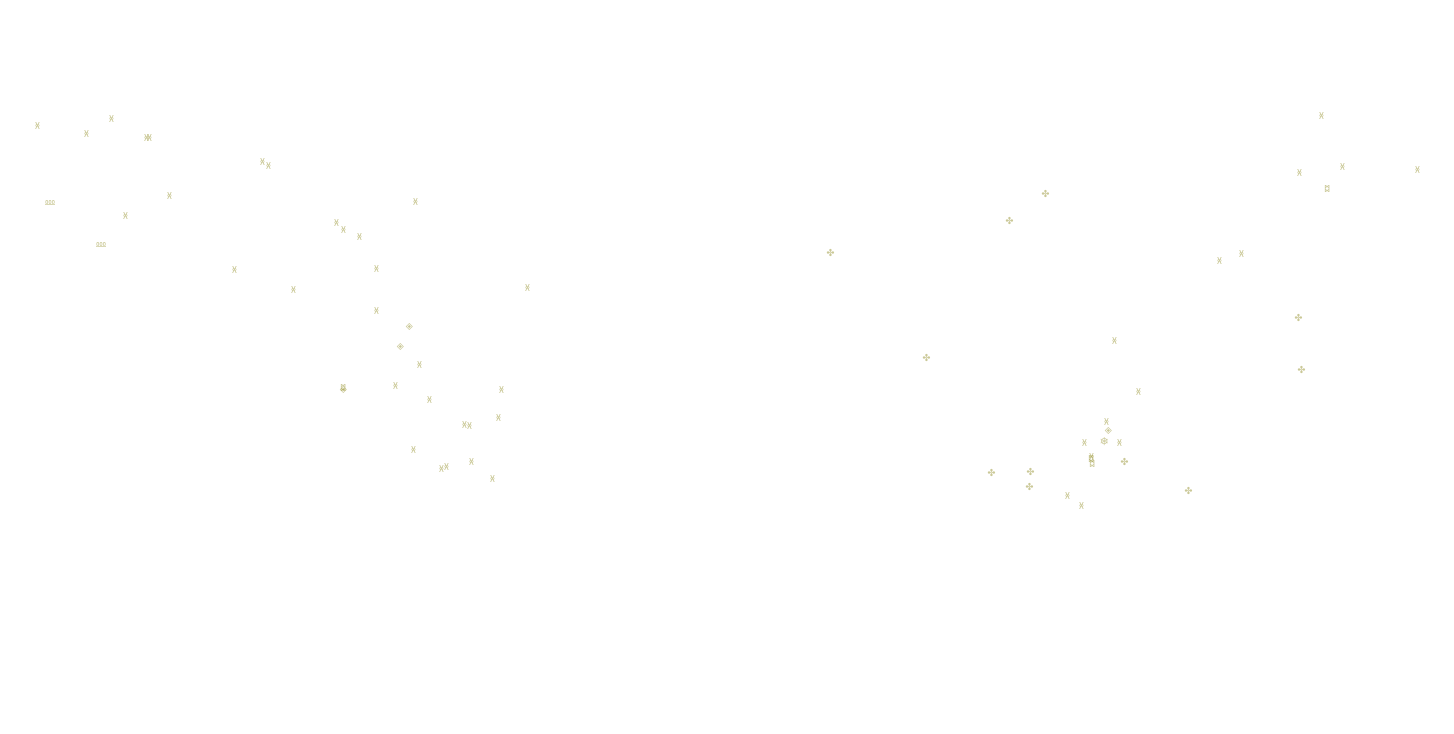

In [44]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree(180))

for index, row in messiers.iterrows(): 
    if row['code'] in [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb"]:
        fontprop = prop_seguihis
    else: 
        fontprop = prop_seguisym
    ax.text(row['ra']*360/24, row['dec'], row['code'], transform=ccrs.Geodetic(), alpha=0.5,
          fontsize=12, color=other_color, ha='center', va='center', fontproperties=fontprop)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/messier_ngcs.pdf')

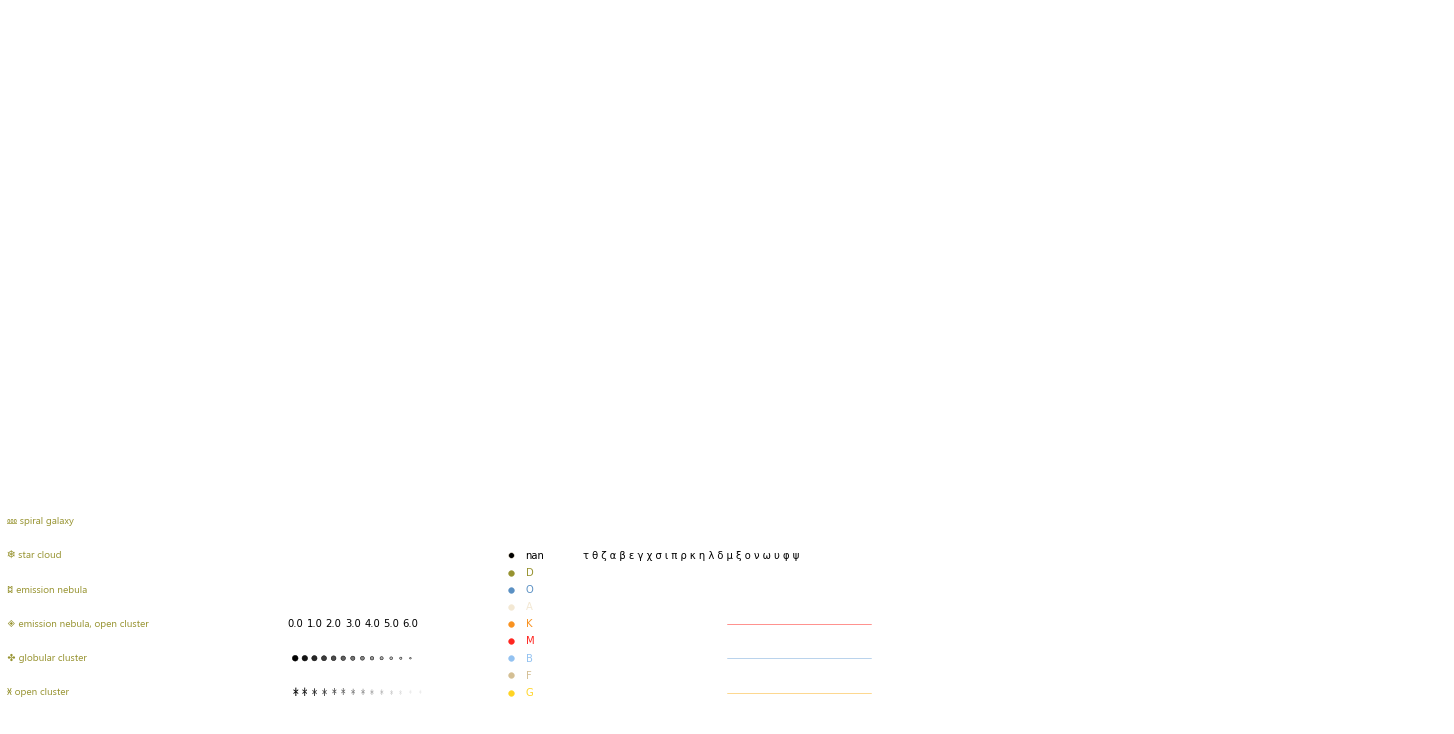

In [15]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Key for non-star object codes
codes = messiers.drop_duplicates(subset='type', keep='first')
codes.reset_index(inplace=True)
for index, row in codes.iterrows(): 
    if row['code'] in [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb"]:
        fontprop = prop_seguihis
    else: 
        fontprop = prop_seguisym
    ax.text(0, index, row['code']+" "+row['type'], alpha=1, fontsize=12, 
            color=other_color, ha='left', va='center', fontproperties=fontprop)
    
# Keys for star sizes
mags = np.arange(0, 6.55, 0.5)
for index, mag in enumerate(mags): 
    # Numbers
    if index % 2 == 0:
        ax.text(2+index/15, 2, mag, ha='center', va='center')
    
    # Key for variable star sizes
    ax.text(2+index/15, 0, u"\u16BC", fontproperties=prop_seguihis, fontsize=(12-mag), 
            alpha=max(0.1, min(1,((6.5-mag)*5)/(6.5*5))), color='k', ha='center', va='center')

    # Key for normal star sizes
    ax.scatter(2+index/15, 1, s=(6.5-mag)*5, color='k', lw=0, edgecolor='none', 
               alpha=min(1, ((6.5-mag)*5)/(6.5*5)))
    ax.scatter(2+index/15, 1, alpha=1, s=(6.5-mag)*5, edgecolor='k', lw=0.5, facecolor='none')

# Key for colors
cols = stars.drop_duplicates(subset='color', keep='first')
cols.reset_index(inplace=True)
for index, row in cols.iterrows(): 
    ax.scatter(3.5, index/2, s=6.5*5, lw=0.5, 
               edgecolor=row['linecolor'], color=row['color'])
    ax.text(3.6, index/2, row['spect_desig'], ha='left', va='center', color=row['color'])

# Key to zodiac colors
ax.plot([5, 6], [0, 0], color=zodiac_color, lw=0.5)
ax.plot([5, 6], [1, 1], color=nonzodiac_color, lw=0.5)
ax.plot([5, 6], [2, 2], color=const_color, lw=0.5)

# Key for colors
cols = stars.drop_duplicates(subset='greek_letters', keep='first')
cols.reset_index(inplace=True)
letterlist = cols['greek_letters'].tolist()
letterlist = [x for x in letterlist if len(str(x)) == 1]
letterlist = " ".join(letterlist)
ax.text(4, 4, letterlist, ha='left', va='center', color=row['color'])

ax.set_xlim(0, 10)
ax.set_ylim(-1, 20)
set_save_image(fig, './figures/key.pdf')

<ipython-input-16-478a0e11f609>:6: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)
<ipython-input-4-fded5518540d>:17: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('none')
<ipython-input-4-fded5518540d>:18: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_fill(False)


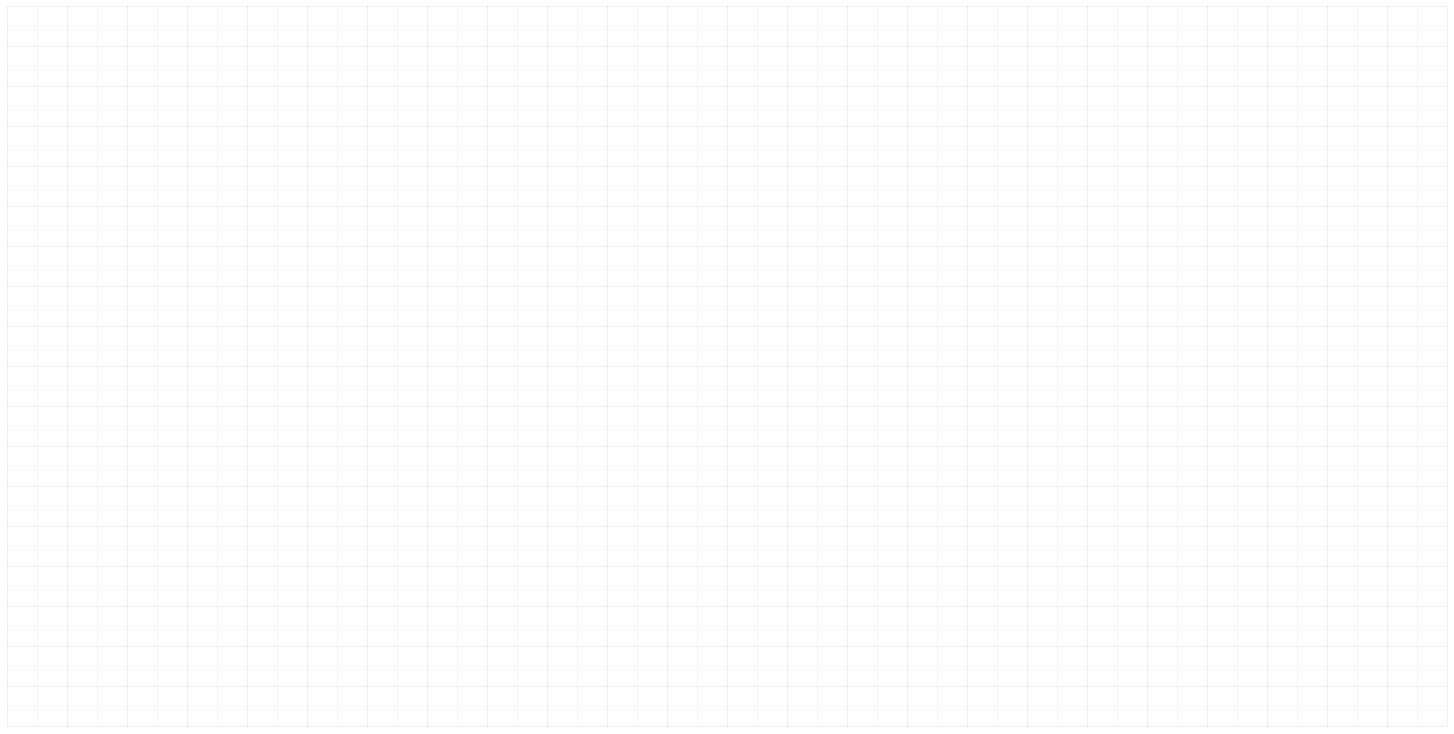

In [16]:
savename = './figures/gridlines.png'

fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.background_patch.set_fill(False)

lon_large = np.arange(-180, 181, 1*360/24)
lon_small = np.arange(-180, 181, 0.5*360/24)
lat_large = np.arange(-90, 91, 10)
lat_small = np.arange(-90, 91, 5)
lat_delim = np.arange(-90, 90.01, 0.1)
lon_delim = np.arange(-180, 180.01, 0.1)

for lg in lat_large: 
    ax.plot(lon_delim, [lg]*len(lon_delim), transform=ccrs.PlateCarree(), 
            color='k', lw=0.25, alpha=0.25, clip_on=False)
for sm in lat_small: 
    if sm not in lat_large: 
        ax.plot(lon_delim, [sm]*len(lon_delim), transform=ccrs.PlateCarree(), 
                color='k', lw=0.125, alpha=0.25, clip_on=False)
for lg in lon_large: 
    ax.plot([lg]*len(lat_delim), lat_delim, transform=ccrs.PlateCarree(), 
            color='k', lw=0.25, alpha=0.25, clip_on=False)
for sm in lon_small: 
    if sm not in lon_large: 
        ax.plot([sm]*len(lat_delim), lat_delim, transform=ccrs.PlateCarree(), 
                color='k', lw=0.125, alpha=0.25, clip_on=False)

set_save_image(fig, savename)

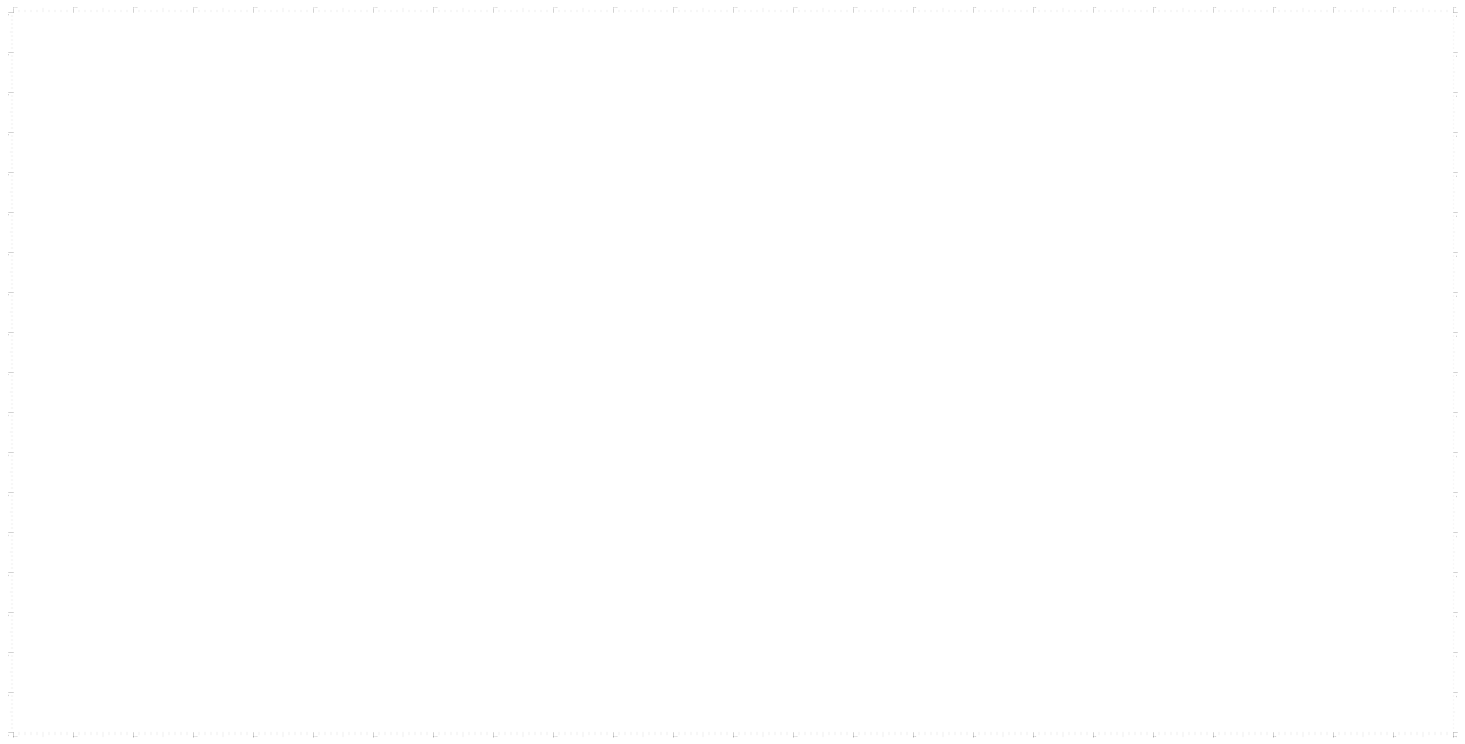

In [43]:
savename = './figures/gridlines_labels.pdf'

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
shift = 20.242874009/20
shift_y = 360*(shift/2)-180
shift_x = 180*(shift/2)-90

lon_large = np.arange(-180, 181, 1*360/24)
lon_small = np.arange(-180, 181, 0.5*360/24)
lon_mini = np.arange(-180, 181, 0.1*360/24)
lat_large = np.arange(-90, 91, 10)
lat_small = np.arange(-90, 91, 5)
lat_mini = np.arange(-90, 91, 1)

for lg in lat_large: 
    ax.plot([-180-shift_x, -180], [lg]*2, color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(-180-shift_x, lg, str(lg)+"°", rotation=-90,
            color='k', alpha=0.35, ha='right', va='top', clip_on=False, fontsize=2)
    ax.plot([180+shift_x, 180], [lg]*2, color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(180+shift_x, lg, str(lg)+"°", rotation=90,
            color='k', alpha=0.35, ha='left', va='top', clip_on=False, fontsize=2)
for sm in lat_small: 
    if sm not in lat_large: 
        ax.plot([-180-shift_x*0.5, -180], [sm]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([180+shift_x*0.5, 180], [sm]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
for m in lat_mini: 
    if (m not in lat_large) and (m not in lat_small): 
        ax.plot([-180-shift_x*0.25, -180], [m]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([180+shift_x*0.25, 180], [m]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
for i, lg in enumerate(lon_large): 
    hr = int(24 - i)
    ax.plot([lg]*2, [-90-shift_y*0.5, -90], color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(lg, -90-shift_y*0.5, str(hr)+"HR", color='k', alpha=0.35, 
            ha='left', va='bottom', clip_on=False, fontsize=2)
    ax.plot([lg]*2, [90+shift_y*0.5, 90], color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(lg, 90+shift_y*0.5, str(hr)+"HR", color='k', alpha=0.35, 
            ha='left', va='bottom', clip_on=False, fontsize=2)
for sm in lon_small: 
    if sm not in lon_large: 
        ax.plot([sm]*2, [-90-shift_y*0.5, -90], color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([sm]*2, [90+shift_y*0.5, 90], color='k', lw=0.25, alpha=0.25, clip_on=False)
for m in lon_mini: 
    if (m not in lon_large) and (m not in lon_small): 
        ax.plot([m]*2, [-90-shift_y*0.25, -90], color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([m]*2, [90+shift_y*0.25, 90], color='k', lw=0.25, alpha=0.25, clip_on=False)

set_save_image(fig, savename)